In [270]:
# IMPORTING LIBRARIES
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns                                   # For pretty plot
from datetime import datetime, timedelta

from sklearn import datasets, linear_model
from sklearn.model_selection import cross_val_predict

from itertools import product

%matplotlib inline
%load_ext autoreload
%autoreload 2

pd.options.display.max_columns = 50

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
full_df = pd.read_csv('2008-2016.txt',header=[0,1],sep='\t',low_memory=False)
full_df.head()

Unnamed: 0_level_0 Unnamed: 1_level_0  Temp    Hi   Low Out  Dew  Wind       \
                Date               Time   Out  Temp  Temp Hum  Pt. Speed  Dir   
0           13/06/08              15:30  15.7  15.7  15.4  46  4.1   1.6   NE   
1           13/06/08              15:40  15.6  15.7  15.6  49  4.9   6.4  NNE   
2           13/06/08              15:50  15.7  15.7  15.6  47  4.4   3.2   NE   
3           13/06/08              16:00  15.4  15.8  15.4  49  4.8   4.8   NW   
4           13/06/08              16:10  15.3  15.4  15.3  49  4.7   4.8   NW   

           Hi       Wind  Heat   THW  THSW Unnamed: 16_level_0  \
    Run Speed  Dir Chill Index Index Index               Bar     
0  0.27   9.7   NE  15.7  14.4  14.4   ---              1013.2   
1  1.07  19.3  NNE  15.6  14.4  14.4   ---              1013.2   
2  0.54  12.9   NE  15.7  14.5  14.5   ---              1013.2   
3  0.80  19.3  NNW  15.4  14.3  14.3   ---              1013.1   
4  0.80  16.1  NNW  15.3  14.2  14.2   ---              1013.1   

  Unnamed: 17_level_0 Rain Solar        Hi Solar   UV        Hi    Heat  \
                 Rain Rate  Rad. Energy    Rad.  Index Dose  UV    D-D    
0                 0.0  0.0   ---    ---      ---   ---  ---  ---  0.019   
1                 0.0  0.0   ---    ---      ---   ---  ---  ---  0.019   
2                 0.0  0.0   ---    ---      ---   ---  ---  ---  0.018   
3                 0.0  0.0   ---    ---      ---   ---  ---  ---  0.020   
4                 0.0  0.0   ---    ---      ---   ---  ---  ---  0.021   

    Cool   In   In   In               In Air Unnamed: 33_level_0 Wind      \
    D-D   Temp Hum   Dew  Heat   EMC Density                 ET  Samp Tx    
0  0.000  25.3  44  12.2  25.1  8.20  1.1665                 0.0  175   1   
1  0.000  25.2  45  12.4  24.9  8.40  1.1670                 0.0   95   1   
2  0.000  25.1  45  12.3  24.8  8.41  1.1675                 0.0  232   1   
3  0.000  25.1  45  12.3  24.8  8.41  1.1674                 0.0  233   1   
4  0.000  24.9  45  12.2  24.7  8.41  1.1680                 0.0  230   1   

    ISS  Arc.  
  Recept Int.  
0   76.8   10  
1   41.7   10  
2  100.0   10  
3  100.0   10  
4  100.0   10

In [3]:
full_df.replace("---",-1,inplace=True)
full_df.head()

Unnamed: 0_level_0 Unnamed: 1_level_0  Temp    Hi   Low Out  Dew  Wind       \
                Date               Time   Out  Temp  Temp Hum  Pt. Speed  Dir   
0           13/06/08              15:30  15.7  15.7  15.4  46  4.1   1.6   NE   
1           13/06/08              15:40  15.6  15.7  15.6  49  4.9   6.4  NNE   
2           13/06/08              15:50  15.7  15.7  15.6  47  4.4   3.2   NE   
3           13/06/08              16:00  15.4  15.8  15.4  49  4.8   4.8   NW   
4           13/06/08              16:10  15.3  15.4  15.3  49  4.7   4.8   NW   

           Hi       Wind  Heat   THW  THSW Unnamed: 16_level_0  \
    Run Speed  Dir Chill Index Index Index               Bar     
0  0.27   9.7   NE  15.7  14.4  14.4    -1              1013.2   
1  1.07  19.3  NNE  15.6  14.4  14.4    -1              1013.2   
2  0.54  12.9   NE  15.7  14.5  14.5    -1              1013.2   
3  0.80  19.3  NNW  15.4  14.3  14.3    -1              1013.1   
4  0.80  16.1  NNW  15.3  14.2  14.2    -1              1013.1   

  Unnamed: 17_level_0 Rain Solar        Hi Solar   UV       Hi    Heat   Cool  \
                 Rain Rate  Rad. Energy    Rad.  Index Dose UV    D-D    D-D    
0                 0.0  0.0    -1     -1       -1    -1   -1  -1  0.019  0.000   
1                 0.0  0.0    -1     -1       -1    -1   -1  -1  0.019  0.000   
2                 0.0  0.0    -1     -1       -1    -1   -1  -1  0.018  0.000   
3                 0.0  0.0    -1     -1       -1    -1   -1  -1  0.020  0.000   
4                 0.0  0.0    -1     -1       -1    -1   -1  -1  0.021  0.000   

    In   In   In               In Air Unnamed: 33_level_0 Wind       ISS  Arc.  
   Temp Hum   Dew  Heat   EMC Density                 ET  Samp Tx  Recept Int.  
0  25.3  44  12.2  25.1  8.20  1.1665                 0.0  175   1   76.8   10  
1  25.2  45  12.4  24.9  8.40  1.1670                 0.0   95   1   41.7   10  
2  25.1  45  12.3  24.8  8.41  1.1675                 0.0  232   1  100.0   10  
3  25.1  45  12.3  24.8  8.41  1.1674                 0.0  233   1  100.0   10  
4  24.9  45  12.2  24.7  8.41  1.1680                 0.0  230   1  100.0   10

In [4]:
full_df.head()

Unnamed: 0_level_0 Unnamed: 1_level_0  Temp    Hi   Low Out  Dew  Wind       \
                Date               Time   Out  Temp  Temp Hum  Pt. Speed  Dir   
0           13/06/08              15:30  15.7  15.7  15.4  46  4.1   1.6   NE   
1           13/06/08              15:40  15.6  15.7  15.6  49  4.9   6.4  NNE   
2           13/06/08              15:50  15.7  15.7  15.6  47  4.4   3.2   NE   
3           13/06/08              16:00  15.4  15.8  15.4  49  4.8   4.8   NW   
4           13/06/08              16:10  15.3  15.4  15.3  49  4.7   4.8   NW   

           Hi       Wind  Heat   THW  THSW Unnamed: 16_level_0  \
    Run Speed  Dir Chill Index Index Index               Bar     
0  0.27   9.7   NE  15.7  14.4  14.4    -1              1013.2   
1  1.07  19.3  NNE  15.6  14.4  14.4    -1              1013.2   
2  0.54  12.9   NE  15.7  14.5  14.5    -1              1013.2   
3  0.80  19.3  NNW  15.4  14.3  14.3    -1              1013.1   
4  0.80  16.1  NNW  15.3  14.2  14.2    -1              1013.1   

  Unnamed: 17_level_0 Rain Solar        Hi Solar   UV       Hi    Heat   Cool  \
                 Rain Rate  Rad. Energy    Rad.  Index Dose UV    D-D    D-D    
0                 0.0  0.0    -1     -1       -1    -1   -1  -1  0.019  0.000   
1                 0.0  0.0    -1     -1       -1    -1   -1  -1  0.019  0.000   
2                 0.0  0.0    -1     -1       -1    -1   -1  -1  0.018  0.000   
3                 0.0  0.0    -1     -1       -1    -1   -1  -1  0.020  0.000   
4                 0.0  0.0    -1     -1       -1    -1   -1  -1  0.021  0.000   

    In   In   In               In Air Unnamed: 33_level_0 Wind       ISS  Arc.  
   Temp Hum   Dew  Heat   EMC Density                 ET  Samp Tx  Recept Int.  
0  25.3  44  12.2  25.1  8.20  1.1665                 0.0  175   1   76.8   10  
1  25.2  45  12.4  24.9  8.40  1.1670                 0.0   95   1   41.7   10  
2  25.1  45  12.3  24.8  8.41  1.1675                 0.0  232   1  100.0   10  
3  25.1  45  12.3  24.8  8.41  1.1674                 0.0  233   1  100.0   10  
4  24.9  45  12.2  24.7  8.41  1.1680                 0.0  230   1  100.0   10

In [5]:
useful_indx = full_df["Solar"]["Rad."] != -1

In [6]:
usefuldata = full_df.loc[useful_indx]

In [7]:
usefuldata.head()

Unnamed: 0_level_0 Unnamed: 1_level_0  Temp    Hi   Low Out   Dew  Wind  \
                    Date               Time   Out  Temp  Temp Hum   Pt. Speed   
51979           09/06/09              17:20  20.4  20.4  20.2  57  11.6   8.0   
51980           09/06/09              17:30  20.3  20.7  20.3  57  11.5  11.3   
51981           09/06/09              17:40  19.8  20.3  19.8  57  11.0  14.5   
51982           09/06/09              17:50  19.8  20.0  19.8  59  11.5  14.5   
51983           09/06/09              18:00  20.1  20.2  19.8  57  11.3  16.1   

                    Hi       Wind  Heat   THW  THSW Unnamed: 16_level_0  \
       Dir   Run Speed  Dir Chill Index Index Index               Bar     
51979   SW  1.34  19.3  SSW  20.4  19.9  19.9  26.7              1012.7   
51980   SW  1.88  24.1  WSW  20.3  19.9  19.9  26.4              1012.8   
51981   SW  2.41  30.6  WSW  19.0  19.4  18.6  24.8              1012.8   
51982   SW  2.41  29.0  WNW  19.0  19.5  18.7  23.6              1012.7   
51983  WSW  2.68  35.4   SW  18.9  19.7  18.6  24.1              1012.6   

      Unnamed: 17_level_0 Rain Solar        Hi Solar   UV       Hi    Heat  \
                     Rain Rate  Rad. Energy    Rad.  Index Dose UV    D-D    
51979                 0.0  0.8   703  10.08      708    -1   -1  -1  0.000   
51980                 0.0  0.0   675   9.68      710    -1   -1  -1  0.000   
51981                 0.0  0.0   656   9.40      687    -1   -1  -1  0.000   
51982                 0.0  0.0   475   6.81      650    -1   -1  -1  0.000   
51983                 0.0  0.0   567   8.13      631    -1   -1  -1  0.000   

        Cool   In   In   In               In Air Unnamed: 33_level_0 Wind      \
        D-D   Temp Hum   Dew  Heat   EMC Density                 ET  Samp Tx    
51979  0.014  26.8  42  12.8  26.3  7.85  1.1597                0.00  231   1   
51980  0.014  26.8  42  12.8  26.3  7.85  1.1599                0.00  233   1   
51981  0.010  26.9  42  12.9  26.4  7.85  1.1593                0.00  229   1   
51982  0.010  26.9  42  12.9  26.4  7.85  1.1592                0.00  233   1   
51983  0.012  26.8  38  11.3  26.1  7.25  1.1613                0.36  235   1   

        ISS  Arc.  
      Recept Int.  
51979  100.0   10  
51980  100.0   10  
51981  100.0   10  
51982  100.0   10  
51983  100.0   10

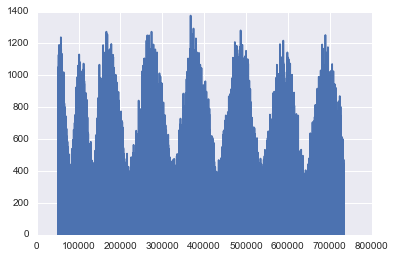

In [8]:
plt.plot(usefuldata["Solar"]["Rad."].apply(int))

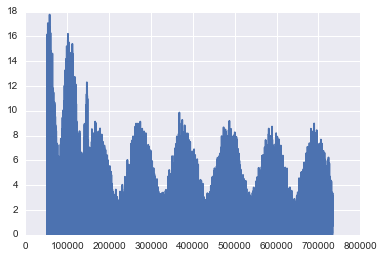

In [9]:
plt.plot(usefuldata["Solar"]["Energy"])

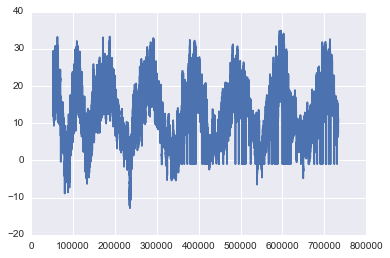

In [10]:
plt.plot(usefuldata["Temp"]["Out"])

In [118]:
date_df = usefuldata["Unnamed: 0_level_0"]
time_df = usefuldata["Unnamed: 1_level_0"]
irrad_df = usefuldata["Solar"].astype(float)

In [119]:
solar_df = pd.concat([date_df,irrad_df],axis=1)

In [120]:
solar_df.head()

,Date,Rad.,Energy
51979,09/06/09,703.0,10.08
51980,09/06/09,675.0,9.68
51981,09/06/09,656.0,9.40
51982,09/06/09,475.0,6.81
51983,09/06/09,567.0,8.13


In [123]:
daily_df = solar_df.groupby("Date").agg(np.mean)
daily_df = daily_df.reset_index()

In [124]:
daily_df.head(10)

,Date,Rad.,Energy
0,01/01/10,15.006944,0.215139
1,01/01/11,33.743056,0.483819
2,01/01/12,27.871528,0.199722
3,01/01/13,11.493056,0.082396
4,01/01/14,55.697917,0.399271
5,01/01/15,60.197917,0.431528
6,01/01/16,14.197917,0.101910
7,01/02/10,57.590278,0.825417
8,01/02/11,16.631944,0.238472
9,01/02/12,83.371528,0.597639


In [125]:
daily_df["Date"] = pd.to_datetime(daily_df["Date"],dayfirst=True)

In [127]:
daily_df["Day"] = pd.DatetimeIndex(mean_df["Date"]).day
daily_df["Month"] = pd.DatetimeIndex(mean_df["Date"]).month
daily_df["Year"] = pd.DatetimeIndex(mean_df["Date"]).year
daily_df = daily_df.drop(['Date','Energy'],axis=1)

In [312]:
monthly_df = daily_df.groupby(["Month","Year"]).agg(np.mean)
monthly_df = monthly_df.drop("Day",axis=1)
monthly_df = monthly_df.reset_index()
monthly_df = monthly_df.set_index("Month")
monthly_df.head(10)

,Year,Rad.
Month,,
1,2010,40.620228
1,2011,51.752751
1,2012,40.024908
1,2013,45.739419
1,2014,44.283098
1,2015,40.800199
1,2016,36.255600
2,2010,69.955995
2,2011,82.666171


In [354]:
X = []
y = []
predicted = []
pred = []
    
for i in range(1,13):
    X.append(monthly_df.loc[i]["Year"].get_values())
    y.append(monthly_df.loc[i]["Rad."].get_values())
    regr = linear_model.LinearRegression()
    # predicted.append(cross_val_predict(regr,X[i-1].reshape(-1,1), y[i-1], cv=3))
    pred.append(regr.fit(X[i-1].reshape(-1,1), y[i-1]))

In [365]:
years = range(2017,2060)
future = np.empty([len(years),12])

for j in years:
    for i in range(1,13):
        future[j-2017][i-1] = pred[i-1].predict(j)

In [367]:
future.shape

(43, 12)

In [368]:
future

array([[  3.83907724e+01,   6.08329347e+01,   1.26464358e+02,
          1.52516188e+02,   1.96981303e+02,   2.32948897e+02,
          2.39077666e+02,   1.98984106e+02,   1.47869310e+02,
          8.07616599e+01,   7.24401473e+01,   4.43919960e+01],
       [  3.72928868e+01,   5.71227182e+01,   1.24292529e+02,
          1.44622625e+02,   1.93384456e+02,   2.30112592e+02,
          2.38816066e+02,   1.95751135e+02,   1.45782818e+02,
          7.76585517e+01,   7.59432453e+01,   4.61106276e+01],
       [  3.61950012e+01,   5.34125016e+01,   1.22120701e+02,
          1.36729062e+02,   1.89787610e+02,   2.27276287e+02,
          2.38554465e+02,   1.92518165e+02,   1.43696326e+02,
          7.45554436e+01,   7.94463434e+01,   4.78292591e+01],
       [  3.50971155e+01,   4.97022850e+01,   1.19948872e+02,
          1.28835498e+02,   1.86190763e+02,   2.24439982e+02,
          2.38292864e+02,   1.89285194e+02,   1.41609834e+02,
          7.14523354e+01,   8.29494414e+01,   4.95478907e+01],
    

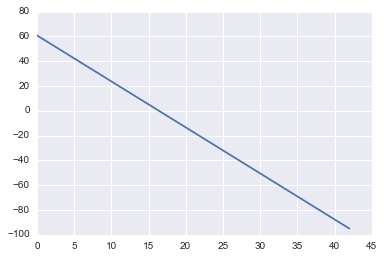

In [386]:
plt.plot(future[:,1])